In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import networkx as nx

# Load data

In [18]:
df = pd.read_csv("../data/raw/observations_v2/CNC_Los_Angeles_2018.csv")
# Convert identifications column (which is a string string) to object
import ast
df['identifications'] = df['identifications'].apply(ast.literal_eval)
df.head()

,id,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,...,preferred_common_name,iconic_taxon_name,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications
0,7936465,Sun Apr 29 2018 14:53:07 GMT-0700 (PDT),2018-04-29T14:53:07-07:00,America/Los_Angeles,2017-09-15T15:13:04-07:00,2018-05-03T14:53:12-07:00,On a pomegranate tree in the NHM edible garden,630902,noelstnick,research,...,NaN,Insecta,species,61257,True,False,False,2152,2152,"[{'user_id': 181940, 'category': 'supporting',..."
1,8261280,Sun Apr 29 2018 16:26:11 GMT-0700 (PDT),2018-04-29T16:26:11-07:00,America/Los_Angeles,2017-10-04T16:26:56-07:00,2019-10-25T19:57:22-07:00,On a pomegranate tree in the NHM edible garden,630902,noelstnick,needs_id,...,Snout and Bark Beetles,Insecta,superfamily,372852,False,False,False,127566,127566,"[{'user_id': 240872, 'category': 'improving', ..."
2,8481460,Sun Apr 29 2018 13:57:13 GMT-0700 (PDT),2018-04-29T13:57:13-07:00,America/Los_Angeles,2017-10-20T13:57:56-07:00,2018-05-03T14:51:28-07:00,On a pomegranate tree in the NHM edible garden,630902,noelstnick,research,...,Oleander Aphid,Insecta,species,55215,False,False,False,8263,8263,"[{'user_id': 630902, 'category': 'improving', ..."
3,8623537,Sun Apr 29 2018 16:54:17 GMT-0700 (PDT),2018-04-29T16:54:17-07:00,America/Los_Angeles,2017-10-30T16:55:45-07:00,2018-05-03T14:51:13-07:00,On a pomegranate tree in the NHM edible garden,630902,noelstnick,casual,...,Mexican Bush Sage,Plantae,species,50644,False,False,False,4397,4397,"[{'user_id': 630902, 'category': None, 'disagr..."
4,8762645,Sun Apr 29 2018 11:32:50 GMT-0700 (PDT),2018-04-29T11:32:50-07:00,America/Los_Angeles,2017-11-11T11:33:49-08:00,2018-10-24T14:30:26-07:00,On a pomegranate tree in the NHM edible garden,630902,noelstnick,research,...,mule fat,Plantae,species,52111,True,False,False,7131,7131,"[{'user_id': 630902, 'category': 'improving', ..."


# Analyse identifications

Have values:
 - improving
 - supporting
 - leading
 - maverick

In [19]:
identifications = []
for _, row in df.iterrows():
    idents = row['identifications']
    for ident in idents:
        identifications.append(ident)
        

In [21]:
dfidents = pd.DataFrame(identifications)
dfidents.head()

,user_id,category,disagreement
0,181940,supporting,False
1,630902,improving,None
2,240872,improving,None
3,805798,leading,False
4,630902,improving,None


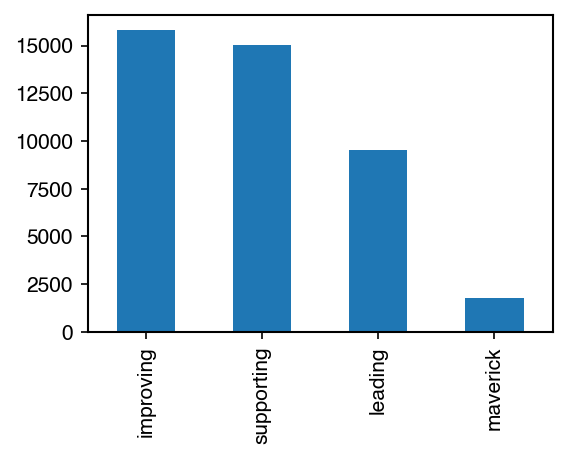

In [28]:
fig = plt.figure(figsize=(4,2.8))
ident_counts = dfidents['category'].value_counts()
ident_counts.plot(kind='bar')
plt.show()

# Convert to network



## Gather edges

In [91]:
edges_list = []
for _, row in df.iterrows():
    idents = row['identifications']
    user_target = row['user_id']
    for ident in idents:
#         if ident['category'] in ['supporting', 'improving']
        user_source = ident['user_id']
        edges_list.append([user_source, user_target])

edges = pd.DataFrame(edges_list, columns=['source', 'target'])
edges = edges.convert_dtypes()
edges['weight'] = 1
edges = edges.groupby(by=['source', 'target']).sum().reset_index()
edges.head()

,source,target,weight
0,1,12809,3
1,1,35725,1
2,1,37802,2
3,1,73504,2
4,1,74669,1


In [92]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   source  9589 non-null   int64
 1   target  9589 non-null   int64
 2   weight  9589 non-null   int64
dtypes: int64(3)
memory usage: 224.9 KB


In [94]:
edges['weight'].max()

1699

**Edge distribution**

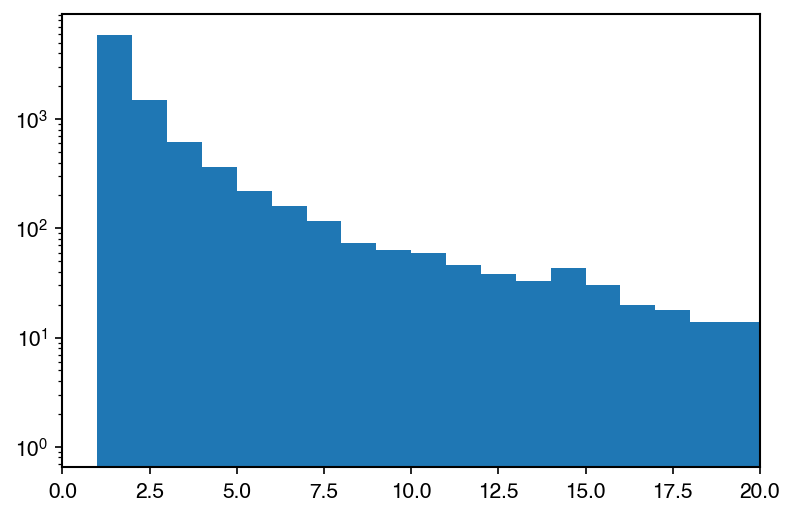

In [99]:
bins = np.linspace(0, 1700, 1700+1)
plt.hist(edges['weight'], bins=bins)
plt.xlim([0,20])
plt.yscale('log')
plt.show()

## Create network from edgelist

In [100]:
g = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight', create_using=nx.DiGraph)

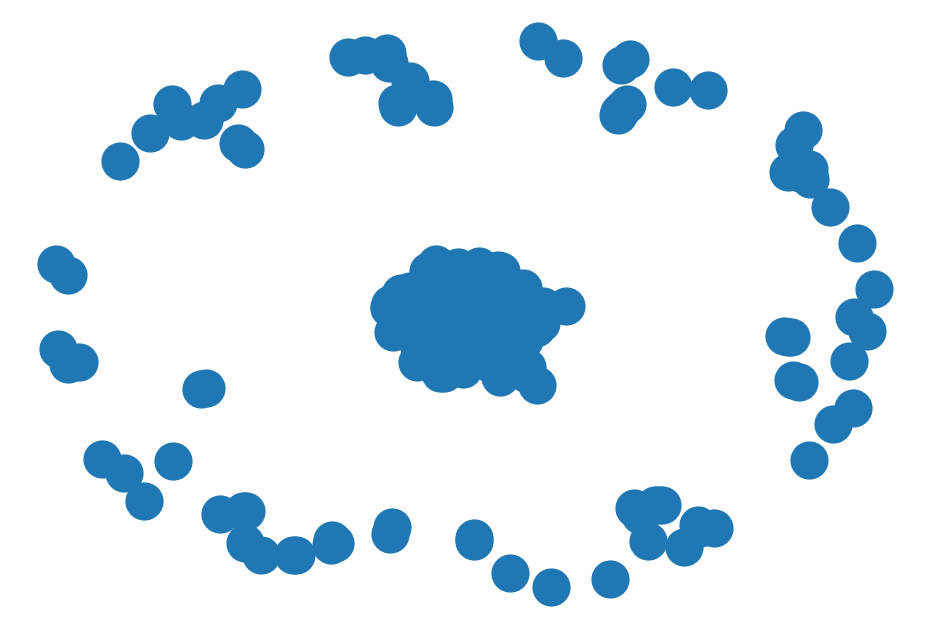

In [82]:
nx.draw(g.to_undirected())

In [ ]:
import networkx as nx
from netwulf import visualize

# G = nx.barabasi_albert_graph(100,m=1)
visualize(g)